In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

1. Using lemonade.csv dataset and focusing on continuous variables:

    

In [2]:
df = pd.read_csv("lemonade.txt")
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
# set the index to the date and set date as datetime
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)
df['month'] = df.index.month_name()
df.head()


,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, 
    using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

    

In [4]:
# define lower and upper bounds
def bounds(df, col, multiplier = 1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    return lower_bound, upper_bound


In [5]:
for col in df.columns:
    # check if the column is a number
    if df[col].dtype in ['int64', 'float64']:
        print(col, bounds(df, col))

Temperature (16.700000000000003, 104.7)
Rainfall (0.26, 1.3)
Flyers (4.0, 76.0)
Price (0.5, 0.5)
Sales (5.0, 45.0)


In [35]:
def lower_outliers(df, col, multiplier = 1.5):
    lower_bound = bounds(df, col, multiplier)[0]
    results = df[df[col] < lower_bound].copy()
    results['outlier'] = col
    return results

In [7]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


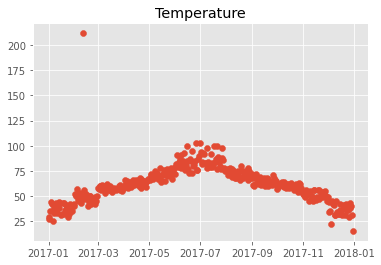

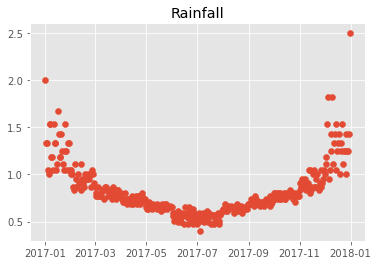

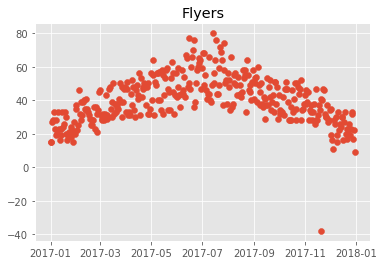

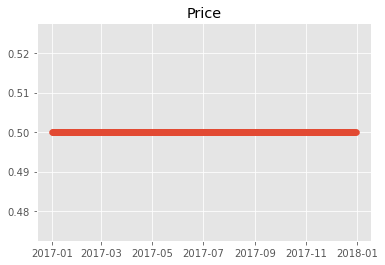

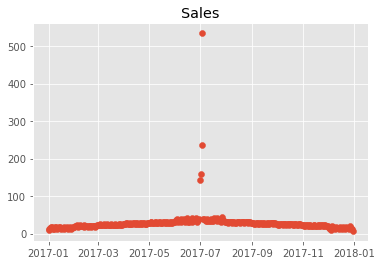

In [8]:
for col in df.columns:
    # check if the column is a number
    if df[col].dtype in ['int64', 'float64']:
        plt.scatter(df.index, df[col])
        plt.title(col)
        plt.show()

In [21]:
outliers=pd.DataFrame()
for col in df.columns:
    # check if the column is a number
    if df[col].dtype in ['int64', 'float64']:
        outliers = outliers.append(lower_outliers(df, col))
outliers        
        

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,outlier
Date,,,,,,,,
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December,Temperature
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,Flyers


In [31]:
# use 1.5 iqr to define the outliers
def get_outliers(df, col, multiplier=1.5):
    lower_bound, upper_bound = bounds(df, col, multiplier)
    results = df[(df[col] < lower_bound) | (df[col] > upper_bound)].copy()
    results['outlier'] = col
    return results

    The flyers outlier should be kept but sign swapped from negative to positive.   

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, 
    using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

  

In [36]:
def upper_outliers(df, col, multiplier = 1.5):
    upper_bound = bounds(df, col, multiplier)[1]
    results = df[df[col] > upper_bound].copy()
    results['outlier'] = col
    return results

In [26]:
outliers=pd.DataFrame()
for col in df.columns:
    # check if the column is a number
    if df[col].dtype in ['int64', 'float64']:
        outliers = outliers.append(upper_outliers(df, col))
outliers    
        

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,outlier
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,Temperature
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,Rainfall
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,Rainfall
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,Rainfall
2017-01-06,Friday,25.3,1.54,23,0.5,11,January,Rainfall
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January,Rainfall
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January,Rainfall
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January,Rainfall
2017-01-13,Friday,37.5,1.33,19,0.5,15,January,Rainfall


    temp is an obvious error and can be removed or replaced with a temp from a similar day or avg for the week.
    rainfall may be real
    sale are likely and error and can be removed or replaced with a sale from a similar day or avg for the week.
    flyers may be real

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


In [37]:
outliers=pd.DataFrame()
for col in df.columns:
    # check if the column is a number
    if df[col].dtype in ['int64', 'float64']:
        outliers = outliers.append(lower_outliers(df, col, 3))
outliers


,Day,Temperature,Rainfall,Flyers,Price,Sales,month,outlier
Date,,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,Flyers


    flip sign for flyers.


Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


In [38]:
outliers=pd.DataFrame()
for col in df.columns:
    # check if the column is a number
    if df[col].dtype in ['int64', 'float64']:
        outliers = outliers.append(upper_outliers(df, col, 3))
outliers


,Day,Temperature,Rainfall,Flyers,Price,Sales,month,outlier
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,Temperature
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,Rainfall
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,Rainfall
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December,Rainfall
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December,Rainfall
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,Sales
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,Sales
2017-07-03,Monday,81.5,0.54,68,0.5,235,July,Sales
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July,Sales


    Adjust or remove temp
    keep rainfall
    adjust or remove sales

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
Use a 2 sigma decision rule to isolate the outliers.


In [39]:
# what are the outliers based on sigma?
def get_outliers_sigma(df, col, sigma=2):
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - (sigma * std)
    upper_bound = mean + (sigma * std)
    results = df[(df[col] < lower_bound) | (df[col] > upper_bound)].copy()
    results['outlier'] = col
    return results
    

In [40]:
outliers=pd.DataFrame()
#all columns appear normally distributed except price which is constant but has no outliers
for col in df.columns:
    # check if the column is a number
    if df[col].dtype in ['int64', 'float64']:
        outliers = outliers.append(get_outliers_sigma(df, col, 2))
outliers

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,outlier
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,Temperature
2017-06-16,Friday,99.3,0.47,77,0.5,41,June,Temperature
2017-06-26,Monday,102.6,0.47,60,0.5,42,June,Temperature
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,Temperature
2017-07-10,Monday,98.0,0.49,66,0.5,40,July,Temperature
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,Temperature
2017-07-22,Saturday,99.6,0.47,49,0.5,42,July,Temperature
2017-07-27,Thursday,97.9,0.47,74,0.5,43,July,Temperature
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,Temperature



Do these make sense?
Should certain outliers be kept or removed?


    Most of these should be kept except the ones identified in the previous questions.

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv




In [41]:
outliers=pd.DataFrame()
#all columns appear normally distributed except price which is constant but has no outliers
for col in df.columns:
    # check if the column is a number
    if df[col].dtype in ['int64', 'float64']:
        outliers = outliers.append(get_outliers_sigma(df, col, 3))
outliers

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,outlier
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,Temperature
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,Rainfall
2017-01-16,Monday,30.6,1.67,24,0.5,12,January,Rainfall
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,Rainfall
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December,Rainfall
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December,Rainfall
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,Flyers
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,Sales
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,Sales


    Keep the rain and edit or remove the others